In [0]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data
from torchtext import datasets

import urllib.request

from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

from ast import literal_eval
import spacy

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/YSU_Masters/CS229_movie/train_final.csv')
valid_data = pd.read_csv('/content/drive/My Drive/YSU_Masters/CS229_movie/val_final.csv')
test_data = pd.read_csv('/content/drive/My Drive/YSU_Masters/CS229_movie/test_final.csv')

NameError: ignored

In [14]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
train_X = train_data.drop(columns=['posterID','imdb_score'])
valid_X = valid_data.drop(columns=['posterID','imdb_score'])
test_X = test_data.drop(columns=['posterID','imdb_score'])

(13194, 5910)
(2828, 5910)
(2828, 5910)


## Random Forest Hyperparameter tuning

In [8]:
train_R2_list = []
train_MSE_list = []

dev_R2_list = []
dev_MSE_list = []

time_list = [] # seconds

tree_number_range = list(range(1, 10, 2)) + list(range(10, 50, 5)) + list(range(50, 160, 10))
# max_depth_range = range(18) * 5 + 10

for n in tree_number_range:
  print(n)
  start_time = time.time()
  rfreg = RandomForestRegressor(max_depth=32, random_state=0,n_estimators=n)
  rfreg.fit(train_X, train_data['imdb_score'])

  time_list.append(time.time() - start_time)

  train_R2_list.append(rfreg.score(train_X, train_data['imdb_score']))
  train_MSE_list.append(mean_squared_error(rfreg.predict(train_X), train_data['imdb_score']))

  dev_R2_list.append(rfreg.score(valid_X, valid_data['imdb_score']))
  dev_MSE_list.append(mean_squared_error(rfreg.predict(valid_X), valid_data['imdb_score']))

para_test_nestimator = {
    'train_R2_list': train_R2_list,
    'train_MSE_list': train_MSE_list,
    'dev_R2_list': dev_R2_list,
    'dev_MSE_list': dev_MSE_list,
    'time_list': time_list
}

1
3
5
7
9
10
15
20
25
30
35
40
45
50
60
70
80
90
100
110
120
130


KeyboardInterrupt: ignored

In [10]:
train_R2_list

[0.5368457654227279,
 0.7149955088505666,
 0.7629617147412858,
 0.7875536871874915,
 0.8000584636902546,
 0.8040038796648937,
 0.8116345995093629,
 0.818370467990216,
 0.8208281441082106,
 0.8246513415650909,
 0.8262328927646068,
 0.8271048472778484,
 0.8269429027131421,
 0.8264131245207879,
 0.8262773809192165,
 0.8264813829785098,
 0.8270459718638941,
 0.8280871426283931,
 0.828012211780971,
 0.8277606247160437,
 0.8287271737443447]

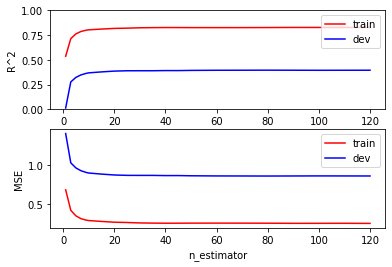

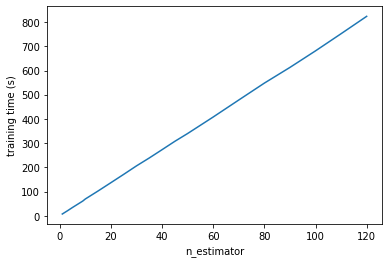

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(tree_number_range, train_R2_list, color = 'red', label = 'train')
ax1.plot(tree_number_range, dev_R2_list, color = 'blue', label = 'dev')
ax1.legend(loc='upper right')

# ax1.set_xlabel('n_estimator')
ax1.set_ylabel('R^2')
# ax1.set_xlim([0, 200])
ax1.set_ylim([0, 1])

ax2.plot(tree_number_range, train_MSE_list, color = 'red', label = 'train')
ax2.plot(tree_number_range, dev_MSE_list, color = 'blue', label = 'dev')
ax2.legend(loc='upper right')

ax2.set_xlabel('n_estimator')
ax2.set_ylabel('MSE')
# ax2.set_xlim([0, 200])
# ax2.set_ylim([0, 1.2])
fig.show()


fig0, ax0 = plt.subplots()
ax0.plot(tree_number_range, time_list)
ax0.set_xlabel('n_estimator')
ax0.set_ylabel('training time (s)')
fig0.show()

fig.savefig('/content/drive/My Drive/YSU_Masters/CS229_movie/plots/RandomForest_nestimator.png')
fig0.savefig('/content/drive/My Drive/YSU_Masters/CS229_movie/plots/RandomForest_nestimator_traintime.png')

In [14]:
train_R2_list = []
train_MSE_list = []

dev_R2_list = []
dev_MSE_list = []

time_list = [] # seconds

max_depth_range = list(range(10, 101, 10))

for d in max_depth_range:
  print(d)
  start_time = time.time()
  rfreg = RandomForestRegressor(max_depth=d, random_state=0, n_estimators=20)
  rfreg.fit(train_X, train_data['imdb_score'])

  time_list.append(time.time() - start_time)

  train_R2_list.append(rfreg.score(train_X, train_data['imdb_score']))
  train_MSE_list.append(mean_squared_error(rfreg.predict(train_X), train_data['imdb_score']))

  dev_R2_list.append(rfreg.score(valid_X, valid_data['imdb_score']))
  dev_MSE_list.append(mean_squared_error(rfreg.predict(valid_X), valid_data['imdb_score']))

para_test_maxdepth = {
    'train_R2_list': train_R2_list,
    'train_MSE_list': train_MSE_list,
    'dev_R2_list': dev_R2_list,
    'dev_MSE_list': dev_MSE_list,
    'time_list': time_list
}

10
20
30
40
50
60
70
80
90
100


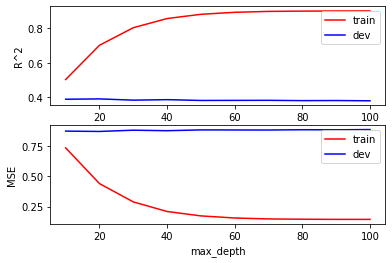

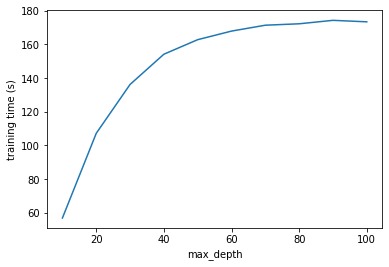

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(max_depth_range, train_R2_list, color = 'red', label = 'train')
ax1.plot(max_depth_range, dev_R2_list, color = 'blue', label = 'dev')
ax1.legend(loc='upper right')

# ax1.set_xlabel('n_estimator')
ax1.set_ylabel('R^2')
# ax1.set_xlim([0, 200])
# ax1.set_ylim([0, 1])

ax2.plot(max_depth_range, train_MSE_list, color = 'red', label = 'train')
ax2.plot(max_depth_range, dev_MSE_list, color = 'blue', label = 'dev')
ax2.legend(loc='upper right')

ax2.set_xlabel('max_depth')
ax2.set_ylabel('MSE')
# ax2.set_xlim([0, 200])
# ax2.set_ylim([0, 1.2])
fig.show()


fig0, ax0 = plt.subplots()
ax0.plot(max_depth_range, time_list)
ax0.set_xlabel('max_depth')
ax0.set_ylabel('training time (s)')
fig0.show()

fig.savefig('/content/drive/My Drive/YSU_Masters/CS229_movie/plots/RandomForest_maxdepth_tree1.png')
fig0.savefig('/content/drive/My Drive/YSU_Masters/CS229_movie/plots/RandomForest_maxdepth_tree1_traintime.png')

## SVM tuning

In [2]:
# from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from thundersvm import SVR
import pickle

ModuleNotFoundError: ignored

In [0]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C': [1.0, 1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(train_X, train_data['imdb_score'])
clf.best_params_

In [0]:
filename = '/content/drive/My Drive/YSU_Masters/CS229_movie/svr_model.sav'
pickle.dump(clf, open(filename, 'wb'))